In [80]:
# Let's create a ML model to predict rent of house.
# Here is the data - Link

# https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt

# Make sure you do data wrangling & get useful insights/visualizations
# Create models using Linear Regressions or variations of it
# Think harder about data preprocessing

In [81]:
#import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('HouseRental.csv')
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   645 non-null    int64  
 1   Sqft         645 non-null    float64
 2   Floor        645 non-null    int64  
 3   TotalFloor   645 non-null    int64  
 4   Bedroom      645 non-null    int64  
 5   Living.Room  645 non-null    int64  
 6   Bathroom     645 non-null    int64  
 7   Price        645 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 40.4 KB


In [303]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [84]:
#insights:

# there is no categorical value data
# there are no null values
# there are 6 explanatory variables : Sqft, Floor, TotalFloot, Bedroom, Living.Room, Bathroom
# the target variable is Price
# the data is clean and looks like it is already preprocessed

In [85]:
df.drop_duplicates() #no duplicates found

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [86]:
#checking for corelation over Price variable

df.corr()['Price']

Unnamed: 0    -0.077512
Sqft           0.825514
Floor          0.244553
TotalFloor     0.333631
Bedroom        0.467059
Living.Room    0.328788
Bathroom       0.605542
Price          1.000000
Name: Price, dtype: float64

In [87]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [88]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


<AxesSubplot:xlabel='Price'>

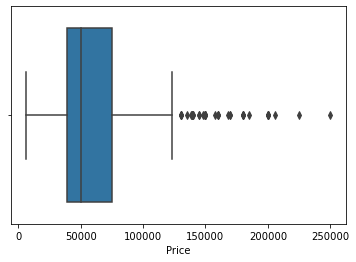

In [89]:
sns.boxplot(x = df['Price'])

<AxesSubplot:xlabel='Price'>

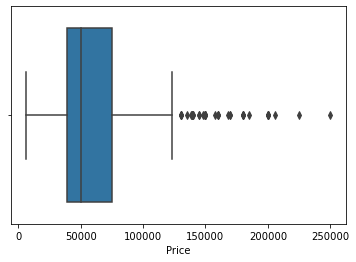

In [90]:
sns.boxplot(x = df['Price'])

<AxesSubplot:xlabel='Bathroom'>

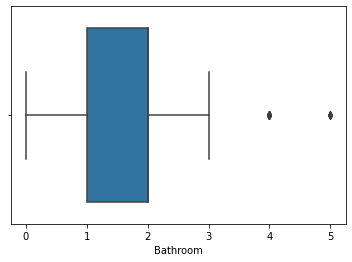

In [91]:
sns.boxplot(x = df['Bathroom'])

<AxesSubplot:xlabel='Bathroom'>

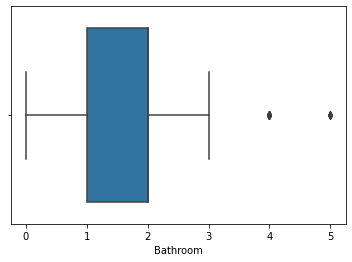

In [92]:
sns.boxplot(x = df['Bathroom'])

<AxesSubplot:xlabel='TotalFloor'>

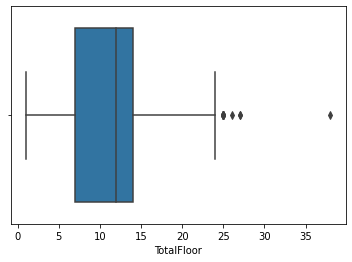

In [93]:
sns.boxplot(x = df['TotalFloor'])

<AxesSubplot:xlabel='Sqft'>

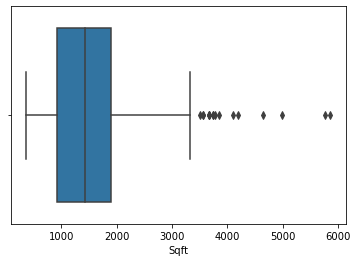

In [94]:
sns.boxplot(x = df['Sqft'])

In [95]:
#we could remove few outliers but due to less data we might lose accuracy of our model

#lets create our regression model

In [130]:
X = df.drop('Price', axis = 1)
y = df.Price

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(np.array(y).reshape(-1,1))

In [131]:
#importing relevant libraries for our model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as tts

In [132]:
X_train, X_test, y_train, y_test = tts(x_scaled, y_scaled, test_size = 0.2, random_state = 42)

my_model = LinearRegression()
my_model.fit(X_train, y_train)

preds = my_model.predict(X_test)

In [133]:
my_model.score(X_test, y_test)

0.7205009707940984

In [100]:
#Thus we received 72% accuray for our model

In [393]:
## COMPLETED   !!!!!!!!!!!!!!!!

In [318]:
#Appendix let's try to create some DL model

In [319]:
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


In [320]:
df = pd.read_csv('HouseRental.csv')
df.tail()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000
644,648,1376.946,6,7,3,2,1,36000


In [321]:
#cleaning data
df.isna().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [322]:
df.dtypes
#there are no categorical values

Unnamed: 0       int64
Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [323]:
df.corr()['Price']

Unnamed: 0    -0.077512
Sqft           0.825514
Floor          0.244553
TotalFloor     0.333631
Bedroom        0.467059
Living.Room    0.328788
Bathroom       0.605542
Price          1.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price'>

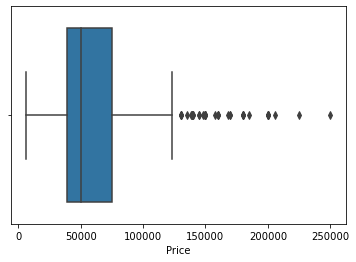

In [324]:
sns.boxplot(x = df['Price'])

In [325]:
df = df[df['Price']<= 200000]


In [326]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

#let's split data into train and test

train = df.sample(frac = 0.8, random_state = 0)
test = df.drop(train.index)

In [205]:
train.shape, test.shape

((516, 7), (129, 7))

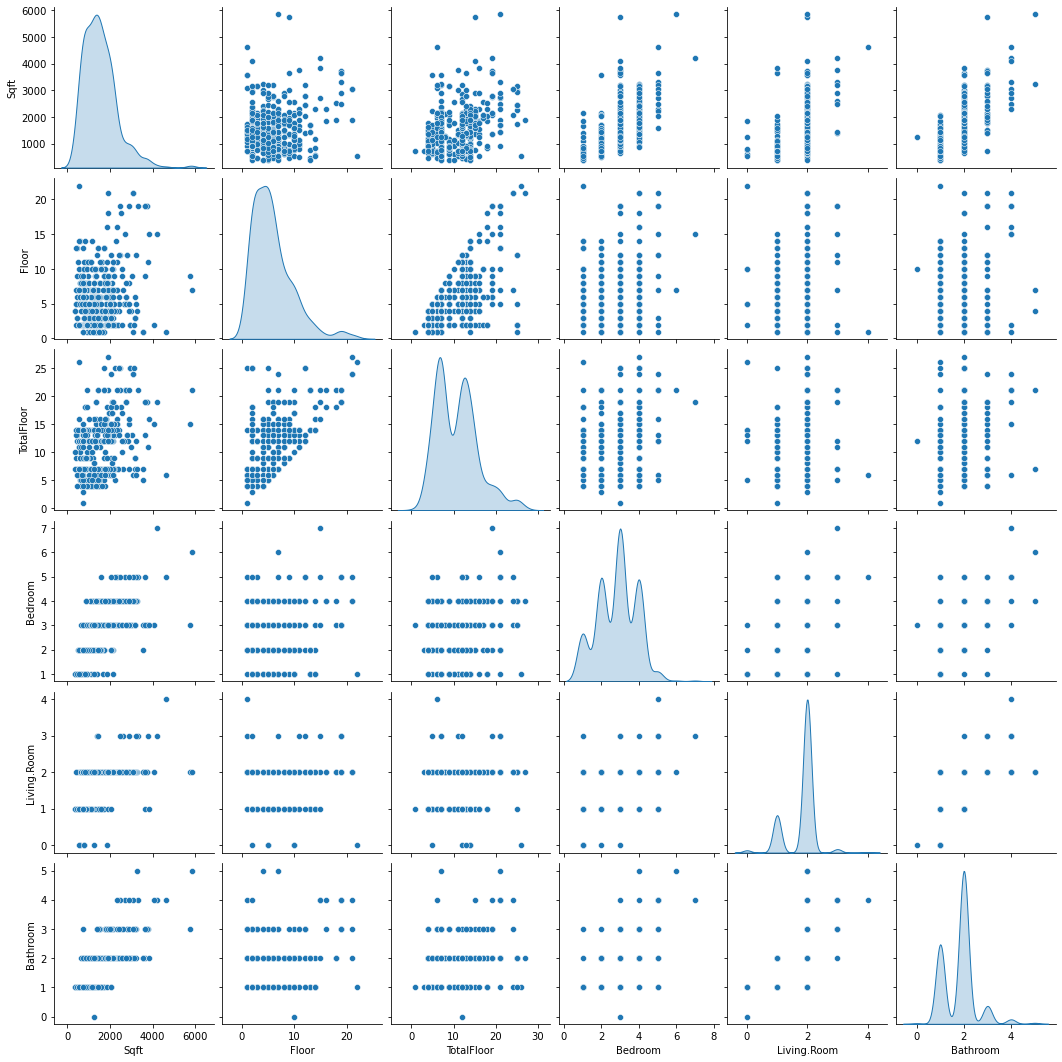

In [109]:
sns.pairplot(train[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']], diag_kind = 'kde')

In [327]:
train_stats = train.describe()
train_stats.drop('Price', axis = 1, inplace= True)
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Sqft,514.0,1525.848992,777.224859,359.358,925.08,1423.2,1908.867,5856.468
Floor,514.0,6.042802,3.904079,1.000,3.00,5.0,8.000,22.000
TotalFloor,514.0,10.941634,4.892260,1.000,7.00,12.0,14.000,27.000
Bedroom,514.0,2.817121,1.013370,1.000,2.00,3.0,4.000,7.000
Living.Room,514.0,1.815175,0.466085,0.000,2.00,2.0,2.000,4.000
Bathroom,514.0,1.795720,0.674733,0.000,1.00,2.0,2.000,5.000


In [328]:
train_labels = train.pop('Price')
test_labels = test.pop('Price')

In [329]:
# since ranges of our features are very varied we need to normalise the data

In [330]:
def norm(x):
    return(x - train_stats['mean']) / train_stats['std']

norm_train = norm(train) 
norm_test = norm(test)

In [331]:
#Building model

my_model = keras.Sequential([
    layers.Dense(20, activation = tf.nn.relu, input_shape = [len(train.keys())]),
    layers.Dense(20, activation = tf.nn.relu),
    layers.Dense(1)
])

OPTIMIZER = tf.keras.optimizers.RMSprop(0.001)

my_model.compile(
    
    loss = 'mse',
    optimizer = OPTIMIZER,
    metrics = ['mae', 'mse']
)


In [332]:
my_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 20)                140       
_________________________________________________________________
dense_41 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 21        
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


In [272]:
#This is just a demo to check if or model is working properly or not !

example_batch = norm_train[:10]
example_result = my_model.predict(example_batch)
example_result

array([[-0.09693679],
       [-0.47971478],
       [-0.36448008],
       [-0.20587835],
       [-0.22599584],
       [-0.13586204],
       [-0.6785592 ],
       [-0.385278  ],
       [-0.33250642],
       [-0.10200521]], dtype=float32)

In [227]:
#lets train our model

EPOCHS = 1000

history = my_model.fit(
    norm_train, train_labels, epochs = EPOCHS, validation_split = 0.2,
    verbose = 0 
)

In [228]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,347552320.0,13434.054688,347552320.0,474827776.0,14375.464844,474827776.0,995
996,347404096.0,13441.638672,347404096.0,474291840.0,14361.656250,474291840.0,996
997,347460416.0,13438.763672,347460416.0,474432640.0,14365.705078,474432640.0,997
998,347682720.0,13442.613281,347682720.0,474096192.0,14361.449219,474096192.0,998
999,347447008.0,13424.043945,347447008.0,474133536.0,14362.656250,474133536.0,999


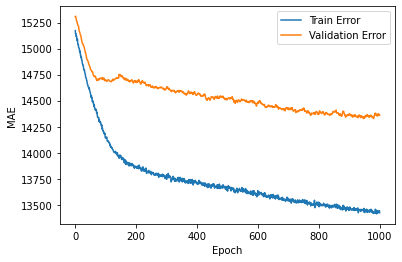

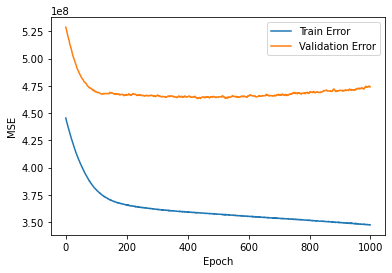

In [229]:
#Plotting history helps us all the time

def plot_history(history):
    
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(hist['epoch'], hist['mae'], label = 'Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Validation Error')
    plt.legend()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(hist['epoch'], hist['mse'], label = 'Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Validation Error')
    plt.legend()
    
plot_history(history)

In [333]:
#We can see that validation error is increasing but training loss is decreasing

#THIS IS CLASSIC OVERFITTING !!!

#so we need to cut off the epochs when validation seems to increase in consecutive iterations

#Let's set the callback for our model

In [348]:
#Recreating our model with a callback parameter
EPOCHS = 1000

h = my_model.fit(
    norm_train, train_labels, validation_split = 0.2, 
    epochs = EPOCHS, batch_size = 16,
    callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 2)
    ]
)

Epoch 1/1000
26/26 [==============================] - 0s 8ms/step - loss: 372599840.0000 - mae: 14117.2236 - mse: 372599840.0000 - val_loss: 384008960.0000 - val_mae: 14047.0518 - val_mse: 384008960.0000
Epoch 2/1000
26/26 [==============================] - 0s 5ms/step - loss: 372448544.0000 - mae: 14109.7275 - mse: 372448544.0000 - val_loss: 383491744.0000 - val_mae: 14033.5801 - val_mse: 383491744.0000
Epoch 3/1000
26/26 [==============================] - 0s 6ms/step - loss: 371969984.0000 - mae: 14095.1377 - mse: 371969984.0000 - val_loss: 383170784.0000 - val_mae: 14030.3203 - val_mse: 383170784.0000
Epoch 4/1000
26/26 [==============================] - 0s 6ms/step - loss: 371775488.0000 - mae: 14091.8604 - mse: 371775488.0000 - val_loss: 382835136.0000 - val_mae: 14025.4658 - val_mse: 382835136.0000
Epoch 5/1000
26/26 [==============================] - 0s 5ms/step - loss: 371604192.0000 - mae: 14091.2969 - mse: 371604192.0000 - val_loss: 382488544.0000 - val_mae: 14020.5342 - val_

26/26 [==============================] - 0s 7ms/step - loss: 363529344.0000 - mae: 13930.8711 - mse: 363529344.0000 - val_loss: 372851520.0000 - val_mae: 13894.0732 - val_mse: 372851520.0000
Epoch 42/1000
26/26 [==============================] - 0s 6ms/step - loss: 363390112.0000 - mae: 13939.5234 - mse: 363390112.0000 - val_loss: 372703872.0000 - val_mae: 13892.9414 - val_mse: 372703872.0000
Epoch 43/1000
26/26 [==============================] - 0s 5ms/step - loss: 363126112.0000 - mae: 13928.4639 - mse: 363126112.0000 - val_loss: 372555648.0000 - val_mae: 13893.9980 - val_mse: 372555648.0000
Epoch 44/1000
26/26 [==============================] - 0s 6ms/step - loss: 363029888.0000 - mae: 13932.8271 - mse: 363029888.0000 - val_loss: 372367712.0000 - val_mae: 13891.1416 - val_mse: 372367712.0000
Epoch 45/1000
26/26 [==============================] - 0s 5ms/step - loss: 362699904.0000 - mae: 13912.0488 - mse: 362699904.0000 - val_loss: 372315232.0000 - val_mae: 13896.1299 - val_mse: 3723

26/26 [==============================] - 0s 5ms/step - loss: 357589504.0000 - mae: 13801.4043 - mse: 357589504.0000 - val_loss: 366460000.0000 - val_mae: 13795.2549 - val_mse: 366460000.0000
Epoch 82/1000
26/26 [==============================] - 0s 5ms/step - loss: 357362176.0000 - mae: 13797.5352 - mse: 357362176.0000 - val_loss: 366268608.0000 - val_mae: 13794.2412 - val_mse: 366268608.0000
Epoch 83/1000
26/26 [==============================] - 0s 5ms/step - loss: 357245376.0000 - mae: 13791.0928 - mse: 357245376.0000 - val_loss: 366157120.0000 - val_mae: 13793.5117 - val_mse: 366157120.0000
Epoch 84/1000
26/26 [==============================] - 0s 5ms/step - loss: 357193856.0000 - mae: 13794.0840 - mse: 357193856.0000 - val_loss: 366147168.0000 - val_mae: 13794.9805 - val_mse: 366147168.0000
Epoch 85/1000
26/26 [==============================] - 0s 4ms/step - loss: 357075392.0000 - mae: 13784.4258 - mse: 357075392.0000 - val_loss: 366102336.0000 - val_mae: 13793.0459 - val_mse: 3661

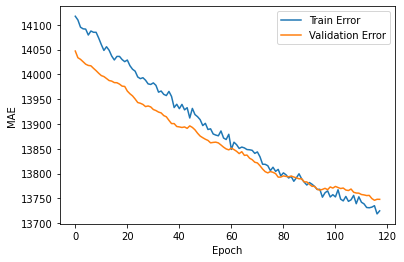

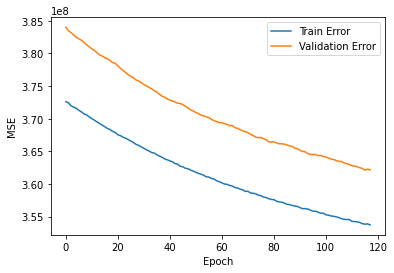

In [349]:
plot_history(h)

#for moritoring val_loss

In [350]:
loss, mae, mse = my_model.evaluate(norm_test, test_labels, verbose = 0)

print("Testing set Mean Absolute Error is : ", mae) #The error in price

Testing set Mean Absolute Error is :  14290.298828125


(5150.0, 177850.0, 21918.05380859375, 194618.05380859374)

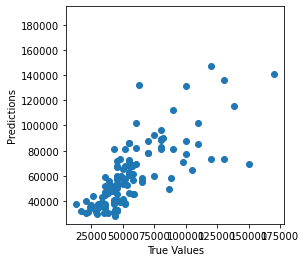

In [381]:
#Making predictions

test_pred = my_model.predict(norm_test).flatten()

plt.scatter(test_labels, test_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')


Text(0, 0.5, 'Count')

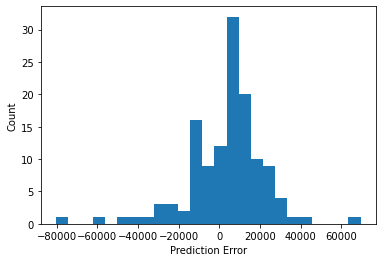

In [382]:
#checking error

error = test_pred - test_labels
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
plt.ylabel('Count')

In [383]:
#It somewhat looks like gaussian

In [386]:
my_model.(test_pred, test_labels, batch_size = 16)

ValueError: in user code:

    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1174 test_step
        y_pred = self(x, training=False)
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_13 is incompatible with the layer: expected axis -1 of input shape to have value 6 but received input with shape [None, 1]


In [390]:
true = np.array(test_labels).flatten()

In [391]:
pred = test_pred.flatten()

In [392]:
from sklearn.metrics import confusion_matrix
confusion_matrix(true, pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets